# Preprocessing with EDA

## Import Library

In [73]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
from time import sleep
import json, os
import csv
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

## Import CSV

In [74]:
from pandas import read_csv


garmin_df = read_csv("garmin_df.csv")
applew_df = read_csv("applew_df.csv")

In [75]:
garmin_df["subreddit"] = "garmin"

In [76]:
garmin_df

,vote,title,text,date,subreddit
0,1,Fix My Garmin - Garmin Repair and Sat Nav Repa...,NaN,2012-12-28,garmin
1,1,How To Handle The Garmin eTrex 20,NaN,2013-04-30,garmin
2,4,Hey guys,[removed],2014-02-12,garmin
3,1,Garmin's New All-In-One Dashcam-Navigator Help...,NaN,2015-04-24,garmin
4,1,Garmin Vivosmart - Black (Large) Reviews,NaN,2015-06-26,garmin
...,...,...,...,...,...
3668,6,Noob question... Apple Watch or Garmin..,[deleted],2019-06-02,garmin
3669,0,Fenix 5: Rusty screws and charging port after ...,"Hey everyone,\n\n\nI took my new Fenix 5 out f...",2019-06-02,garmin
3670,3,"Upgrade from Fenix 3, 245M or 945 ?",Hi! I have been training like three years with...,2019-06-03,garmin
3671,12,HRM-Tri begins to report low HR over the cours...,NaN,2019-06-03,garmin


In [77]:
applew_df["subreddit"] = "applewatch"

In [78]:
applew_df

,vote,title,text,date,subreddit
0,1,Apple Insider: FoxConn in development for iWatch,NaN,2013-02-11,applewatch
1,1,WP: Speculation and wish lists,NaN,2013-02-11,applewatch
2,1,Take my money.,NaN,2013-02-11,applewatch
3,8,"AW designed for daily charging, supports lefties",NaN,2014-09-14,applewatch
4,6,Hands on AppleWatch,NaN,2014-09-16,applewatch
...,...,...,...,...,...
2718,5,What is your favorite feature about Apple Watch?,I'm looking for apps to use with mine and want...,2015-07-11,applewatch
2719,0,Anyone want a 42mm SGS+WSB+ML?,I could sell the watch and black band for 350....,2015-07-11,applewatch
2720,3,iPhone 6+ Beta 3 and AW Beta 2-- Can't pair,[deleted],2015-07-11,applewatch
2721,0,How to find friends with Apple Watches?,Is there any way to scan your contacts and dis...,2015-07-11,applewatch


## Concat Data Frame

In [79]:
concat_watch_df = pd.concat([garmin_df, applew_df],axis = 0)
concat_watch_df

,vote,title,text,date,subreddit
0,1,Fix My Garmin - Garmin Repair and Sat Nav Repa...,NaN,2012-12-28,garmin
1,1,How To Handle The Garmin eTrex 20,NaN,2013-04-30,garmin
2,4,Hey guys,[removed],2014-02-12,garmin
3,1,Garmin's New All-In-One Dashcam-Navigator Help...,NaN,2015-04-24,garmin
4,1,Garmin Vivosmart - Black (Large) Reviews,NaN,2015-06-26,garmin
...,...,...,...,...,...
2718,5,What is your favorite feature about Apple Watch?,I'm looking for apps to use with mine and want...,2015-07-11,applewatch
2719,0,Anyone want a 42mm SGS+WSB+ML?,I could sell the watch and black band for 350....,2015-07-11,applewatch
2720,3,iPhone 6+ Beta 3 and AW Beta 2-- Can't pair,[deleted],2015-07-11,applewatch
2721,0,How to find friends with Apple Watches?,Is there any way to scan your contacts and dis...,2015-07-11,applewatch


## Check Dubplicate posts & Clean Data

In [80]:
concat_watch_df.duplicated().sum()

0

In [81]:
concat_watch_df["text"].duplicated().sum()

2839

In [82]:
concat_watch_df["title"].duplicated().sum()

45

In [83]:
concat_watch_df["text"].drop_duplicates(inplace=True)

In [84]:
concat_watch_df["title"].drop_duplicates(inplace=True)

In [85]:
concat_watch_df.drop_duplicates(subset=["title", "text"], inplace=True)

In [86]:
concat_watch_df.dropna(inplace=True)

In [87]:
concat_watch_df.drop(columns=["vote", "date"], inplace=True)

In [88]:
watch_df = concat_watch_df[~concat_watch_df['text'].isin(['[deleted]','[removed]'])]

In [89]:
watch_df.duplicated().sum()

0

## Check distribution of the classes

In [90]:
watch_df

,title,text,subreddit
8,Garmin dc40 troubles,"Hi, i have 2 garmin dc40 collars that have a b...",garmin
10,Checking to verify this combination will fit m...,"Hi all,\n\n\nI was pointed to Garmin devices b...",garmin
11,Garmin fenix 3,We need to do something this latest update 5.1...,garmin
13,Fenix 3 user manual,Anyone know where to find the user manual for ...,garmin
14,Fenix 3 Mistake,"I love my Fenix 3, but forgot to charge it las...",garmin
...,...,...,...
2717,The difference an adapter makes!!!,Switched to a pin adapter from the other adapt...,applewatch
2718,What is your favorite feature about Apple Watch?,I'm looking for apps to use with mine and want...,applewatch
2719,Anyone want a 42mm SGS+WSB+ML?,I could sell the watch and black band for 350....,applewatch
2721,How to find friends with Apple Watches?,Is there any way to scan your contacts and dis...,applewatch


In [91]:
import re

def remove_emoji_and_newline(text):
    # remove emojis
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # remove newlines
    text = re.sub(r'\n', '', text)
    return text

In [92]:
watch_df.loc[:, 'text'] = watch_df['text'].apply(remove_emoji_and_newline)
watch_df.loc[:, 'title'] = watch_df['title'].apply(remove_emoji_and_newline)

In [93]:
watch_df

,title,text,subreddit
8,Garmin dc40 troubles,"Hi, i have 2 garmin dc40 collars that have a b...",garmin
10,Checking to verify this combination will fit m...,"Hi all,I was pointed to Garmin devices by anot...",garmin
11,Garmin fenix 3,We need to do something this latest update 5.1...,garmin
13,Fenix 3 user manual,Anyone know where to find the user manual for ...,garmin
14,Fenix 3 Mistake,"I love my Fenix 3, but forgot to charge it las...",garmin
...,...,...,...
2717,The difference an adapter makes!!!,Switched to a pin adapter from the other adapt...,applewatch
2718,What is your favorite feature about Apple Watch?,I'm looking for apps to use with mine and want...,applewatch
2719,Anyone want a 42mm SGS+WSB+ML?,I could sell the watch and black band for 350....,applewatch
2721,How to find friends with Apple Watches?,Is there any way to scan your contacts and dis...,applewatch


# Exploratory Data Analysis

In [94]:
# Check distribution of the classes
watch_df['subreddit'].value_counts(normalize=True)


subreddit
garmin        0.644681
applewatch    0.355319
Name: proportion, dtype: float64

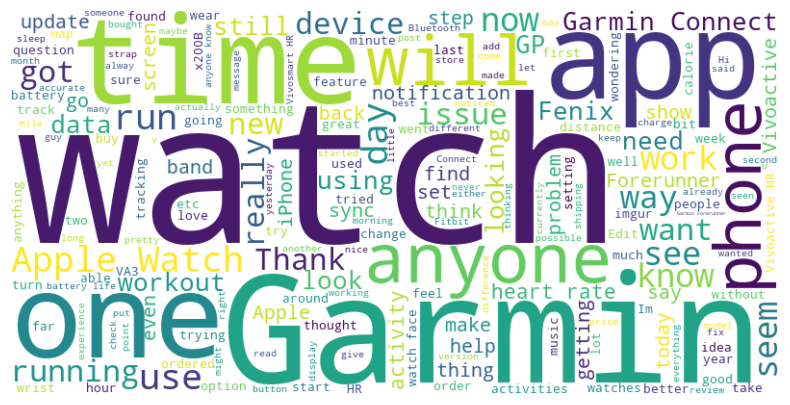

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine 'text' and 'title' columns for wordcloud generation
text_combined = ' '.join(watch_df['text'].tolist() + 
                         watch_df['title'].tolist())

# Generate the wordcloud
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white').generate(text_combined)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [96]:
watch_df.to_csv("watch_df.csv", index=False)

## Go to Modeling file (Optional: Don't have to run below)

In [63]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Combine 'text' and 'title' columns for word frequency analysis
text_combined = ' '.join(watch_df['text'].tolist() + watch_df['title'].tolist())

# Tokenize the combined text
tokens = word_tokenize(text_combined)

# Calculate the frequency distribution of the tokens
fdist = FreqDist(tokens)

# Print the 20 most common words
print(fdist.most_common(20))

[('the', 14449), ('I', 13077), ('.', 11223), (',', 10136), ('to', 9482), ('a', 7433), ('and', 7362), ('it', 6007), ('?', 5588), ('my', 4737), ('on', 3874), ('for', 3836), ('is', 3667), ('of', 3651), ('that', 2911), ('in', 2845), ('watch', 2750), ('have', 2743), ('with', 2719), ('but', 2361)]


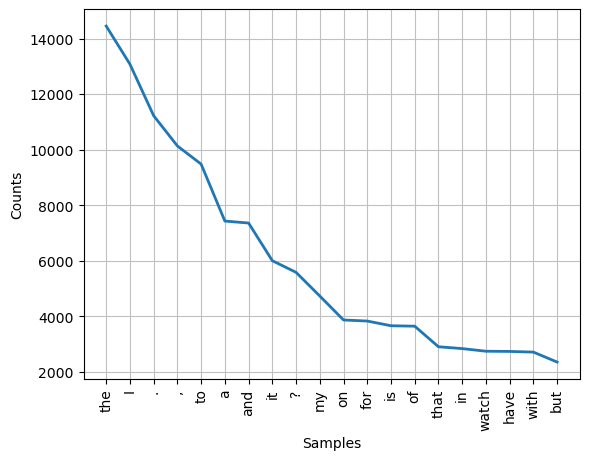

In [64]:
# Plot the frequency distribution
fdist.plot(20);

In [65]:
# regex to remove punctuations, numbers and special characters
import nltk
from nltk.corpus import stopwords
# Download the NLTK stopwords if you haven't already
nltk.download('stopwords')
# Add your custom stop words to the English stopwords list
custom_stopwords = ['Garmin', 'Apple Watch', 'garmin', 'apple', 'watch']
# Get the English stopwords
english_stopwords = set(stopwords.words('english'))
# Combine the English stopwords with your custom stopwords
all_stopwords = english_stopwords.union(custom_stopwords)
# Now 'all_stopwords' contains both the default English stopwords and your custom stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# Check the result after removing punctuation and stopwords
def remove_punctuation_and_stopwords(text):
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in all_stopwords])
    return text

In [67]:
watch_df.loc[:, 'text'] = watch_df['text'].apply(remove_punctuation_and_stopwords)
watch_df.loc[:, 'title'] = watch_df['title'].apply(remove_punctuation_and_stopwords)

In [68]:
# remove apple watch and garmin from text and title columns (include captial letters)
def remove_apple_garmin(text):
    # remove apple watch
    text = re.sub(r'Apple Watch', '', text)
    # remove garmin
    text = re.sub(r'Garmin', '', text)
    return text


In [69]:
watch_df.loc[:, 'text'] = watch_df['text'].apply(remove_apple_garmin)
watch_df.loc[:, 'title'] = watch_df['title'].apply(remove_apple_garmin)

[('I', 10193), ('Im', 1619), ('like', 1219), ('get', 1109), ('would', 993), ('3', 929), ('HR', 872), ('Ive', 843), ('time', 809), ('app', 802), ('one', 772), ('know', 740), ('Fenix', 733), ('anyone', 701), ('phone', 696), ('use', 669), ('dont', 629), ('The', 611), ('run', 586), ('see', 569)]


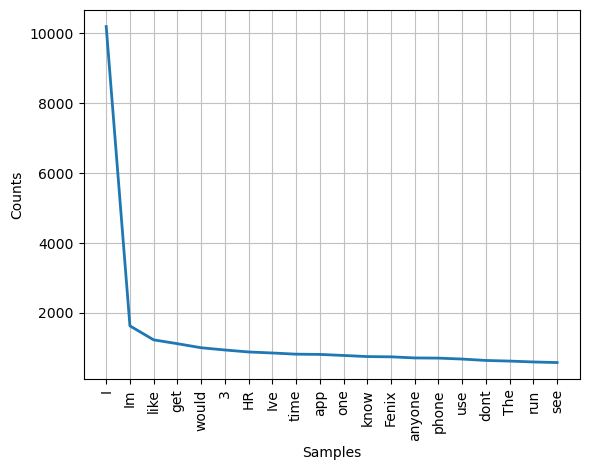

subreddit
garmin        0.644681
applewatch    0.355319
Name: proportion, dtype: float64

In [71]:
# Check punctuation and stopwords again
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Combine 'text' and 'title' columns for word frequency analysis
text_combined = ' '.join(watch_df['text'].tolist() + watch_df['title'].tolist())

# Tokenize the combined text
tokens = word_tokenize(text_combined)

# Calculate the frequency distribution of the tokens
fdist = FreqDist(tokens)

# Print the 20 most common words
print(fdist.most_common(20))

# Plot the frequency distribution
fdist.plot(20);

# Check distribution of the classes
watch_df['subreddit'].value_counts(normalize=True)

In [34]:
# New regex 'I', 'Im', 'like, 'get, 'would
custom_stopwords = ['I', 'Im', 'like', 'get', 'would']
# Get the English stopwords
english_stopwords = set(stopwords.words('english'))

# Combine the English stopwords with your custom stopwords
all_stopwords = english_stopwords.union(custom_stopwords)

[('3', 929), ('HR', 872), ('time', 809), ('app', 802), ('one', 772), ('know', 740), ('Fenix', 733), ('anyone', 701), ('phone', 696), ('use', 669), ('dont', 629), ('run', 586), ('see', 569), ('day', 564), ('Is', 563), ('new', 544), ('way', 540), ('running', 540), ('really', 534), ('data', 530)]


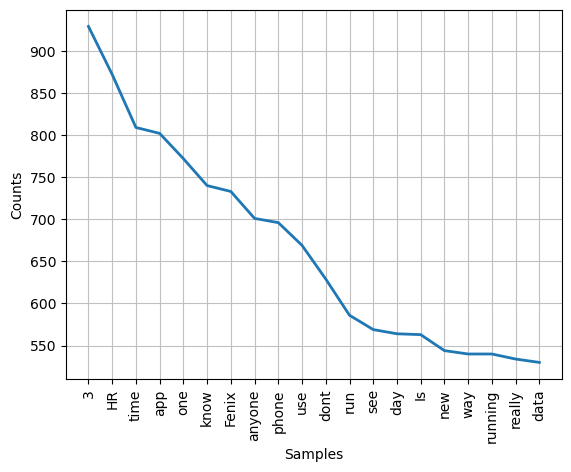

In [35]:
# check more stopwords to remove such as 00garmin, 00apple, 00watch
custom_stopwords = ['I', 'Im', 'like', 'get', 'would', '00garmin', '00apple', '00watch', 'The', 'Ive']
# Get the English stopwords
english_stopwords = set(stopwords.words('english'))

# Combine the English stopwords with your custom stopwords
all_stopwords = english_stopwords.union(custom_stopwords)

# Check the result after removing punctuation and stopwords
def remove_punctuation_and_stopwords(text):
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in all_stopwords])
    return text

watch_df.loc[:, 'text'] = watch_df['text'].apply(remove_punctuation_and_stopwords)
watch_df.loc[:, 'title'] = watch_df['title'].apply(remove_punctuation_and_stopwords)

# Check punctuation and stopwords again
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Combine 'text' and 'title' columns for word frequency analysis
text_combined = ' '.join(watch_df['text'].tolist() + watch_df['title'].tolist())

# Tokenize the combined text
tokens = word_tokenize(text_combined)

# Calculate the frequency distribution of the tokens
fdist = FreqDist(tokens)

# Print the 20 most common words
print(fdist.most_common(20))

# Plot the frequency distribution
fdist.plot(20);

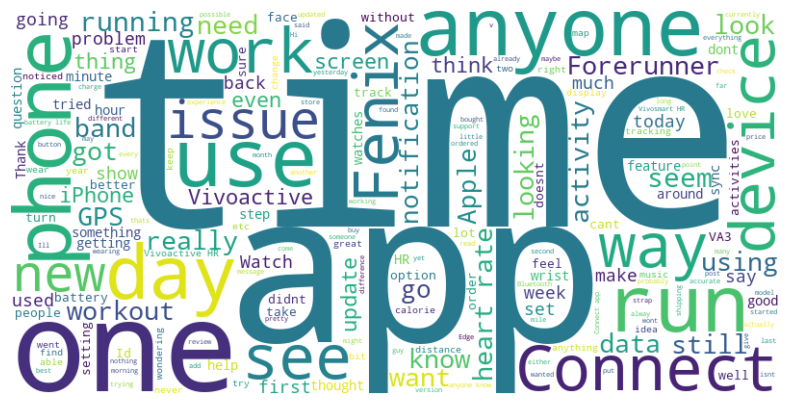

In [36]:
# Check wordcloud again. Already imported
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine 'text' and 'title' columns for wordcloud generation
text_combined = ' '.join(watch_df['text'].tolist() + 
                         watch_df['title'].tolist())

# Generate the wordcloud
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white').generate(text_combined)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
watch_df.isna().sum()

title        0
text         0
subreddit    0
dtype: int64

In [108]:
# Instantiate a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object to the 'subreddit' column of the watch_df dataframe
le.fit(watch_df['subreddit'])

# Transform the 'subreddit' column of the watch_df dataframe using the fitted LabelEncoder object
watch_df.loc[:, 'subreddit_encoded'] = le.transform(watch_df['subreddit'])

# Print the unique values of the 'subreddit' column and the 'subreddit_encoded' column of the watch_df dataframe
print(watch_df['subreddit'].unique())
print(watch_df.loc[:, 'subreddit_encoded'].unique())

['garmin' 'applewatch']
[1 0]


In [109]:
watch_df['subreddit_encoded'].value_counts(normalize=True)

subreddit_encoded
1    0.644681
0    0.355319
Name: proportion, dtype: float64

In [110]:
# Check some of the posts
watch_df['text'].head(10)

8     Hi 2 dc40 collars burn board past warranty loo...
10    Hi allI pointed devices another subreddit rese...
11    We need something latest update 51 destroying ...
13    Anyone know find user manual newest firmware 5...
14    love Fenix 3 forgot charge last night sitting ...
15    looking something similar nuvi 500550 idea mak...
17    So looking rid smartphone due cost upkeep goin...
18    It looks Fenix 3 Optical HR soonEdit forgot ur...
19    Anyone else trouble signing Not able login Con...
21    Anyone else experiences issues auto GPS calibr...
Name: text, dtype: object

In [111]:
# Check frequency distribution of words in the 'title' column
from nltk.probability import FreqDist
# Instantiate a FreqDist object
fdist = FreqDist()

# Tokenize the 'title' column of the watch_df dataframe and 
# update the FreqDist object with the resulting list of tokens
for title in watch_df['title']:
    tokens = title.split()
    fdist.update(tokens)

# Print the 20 most common words in the 'title' column of 
# the watch_df dataframe
print(fdist.most_common(20))

[('3', 339), ('HR', 262), ('Fenix', 259), ('Vivoactive', 248), ('Forerunner', 211), ('How', 141), ('5', 137), ('Watch', 118), ('Connect', 108), ('235', 102), ('Is', 98), ('app', 91), ('vs', 89), ('Vivosmart', 79), ('What', 77), ('Apple', 77), ('Music', 70), ('anyone', 67), ('band', 65), ('935', 65)]
